In [25]:
'''Group 8 / African Crisis'''
'''Introductory section on the data set- Data on African Crisis was extracted from Kaggle wich has 7 categorical variables, and three neumerical variables namely- exchange rate, GDP weight and inflation.The motivation of the data is to explain the effects of systemic crisis (defined as the 
nationwide banking crisis, with increase in bank's NPA to as high as 20% of their loan values, which spreads to the whole banking sector and then to the overall economy)and its causes. External shocks through decline in international commodity prices increased their trade deficits as these
countries are mainly commodity exporters (with low level of diversification). Trade deficits increased government external debts and therefore increased fiscal deficits in these countries and ultimately lead to banking and currecny crisis and inflation during 1980s and 1990s. The greatest 
limitation with the data was absence of any external factor to explain such spillover effect from international markets to domestic markets, since such effect was the very reason for crisis in these economy. Hence in order to provide a meaningful analysis and to depict a cause and effect 
relation, we have supplemented the data with one additional variable called Export price index (source: IMF) at country level. The variable is country-specific commodity price index showing how the export prices for specific country moved between 1962-2014. This was an important indicator to )
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


african_crisis=pd.read_csv('African_crisis.csv')
african_crisis.info()
df1=african_crisis[african_crisis.year >= 1962]
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   code                             1059 non-null   object 
 5   systemic_crisis                  1059 non-null   int64  
 6   exch_usd                         1059 non-null   float64
 7   domestic_debt_in_default         1059 non-null   int64  
 8   sovereign_external_debt_default  1059 non-null   int64  
 9   gdp_weighted_default             1059 non-null   float64
 10  inflation_annual_cpi             1059 non-null   float64
 11  independence                     1059 non-null   int64  
 12  currency_crises     

,case,cc3,country,year,code,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,Banking_crisis_code,Export Price Index
38,1,DZA,Algeria,1968,1968Algeria,0,4.93706,0,0,0.0,6.599988,1,0,0,no_crisis,0,59.058220
39,1,DZA,Algeria,1969,1969Algeria,0,4.93706,0,0,0.0,2.626632,1,0,0,no_crisis,0,58.863850
40,1,DZA,Algeria,1970,1970Algeria,0,4.93706,0,0,0.0,3.656321,1,0,0,no_crisis,0,58.124454
41,1,DZA,Algeria,1971,1971Algeria,0,4.64400,0,0,0.0,6.172816,1,0,0,no_crisis,0,58.642216
42,1,DZA,Algeria,1972,1972Algeria,0,4.55600,0,0,0.0,4.734229,1,0,0,no_crisis,0,58.542313


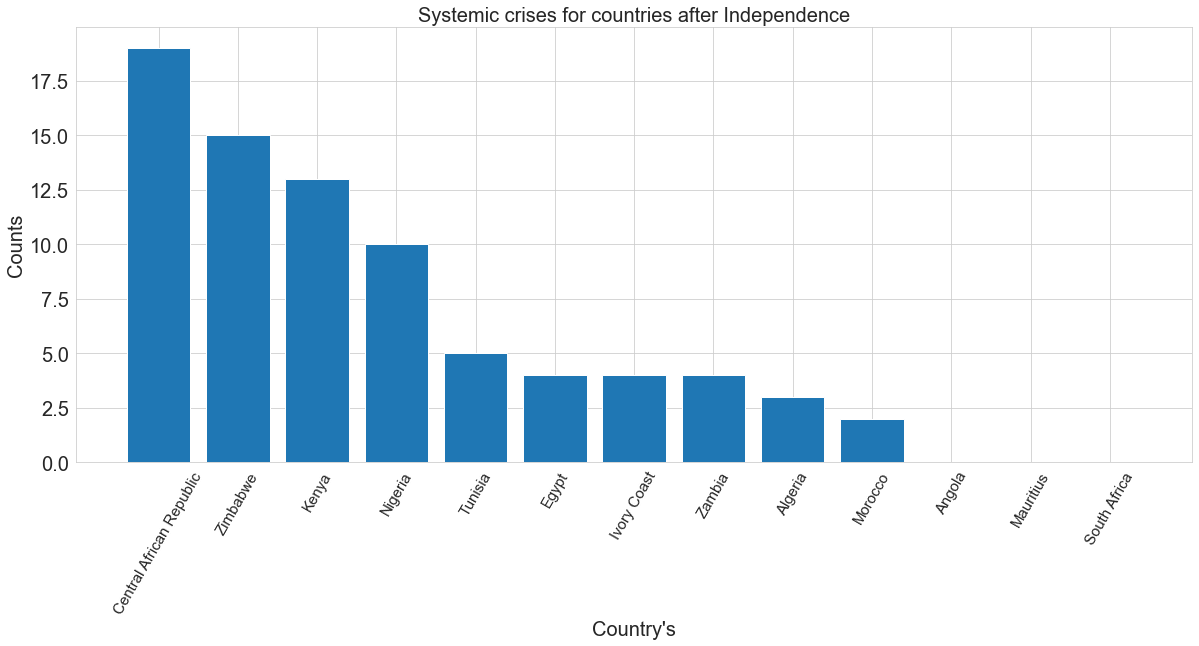

In [27]:
'''Barplot'''
'''Systemic crises after independence'''

#df1["banking_crises"] = np.where(df1['banking_crisis'] == "crisis", 1, 0)

freed_countries =  df1[df1.independence == 1]

#Groupby countries and the systemic crises
sys_crises_per_country_independent = freed_countries.groupby("country",as_index=False)["systemic_crisis"].sum() 

#sort the countries 
countries_sorted_indep = sys_crises_per_country_independent.sort_values(by = ["systemic_crisis"], ascending=False)

#in order to modify the size
plt.figure(figsize=(20,8))

#Set the aesthetic style of the plots
sns.set_style('whitegrid')

# make a plot
plt.bar(countries_sorted_indep["country"], countries_sorted_indep["systemic_crisis"])

# title name
plt.title("Systemic crises for countries after Independence",fontsize=20)

#set the current tick locations
plt.xticks(rotation = 60)
plt.xticks(fontsize=15)
# set y-axis label
plt.ylabel('Counts',fontsize=20)
plt.yticks(fontsize=20)
# set x-axis label
plt.xlabel("Country's",fontsize=20)

plt.savefig('Barchart_Systemic_crisis.pdf',dpi=400)
plt.show()

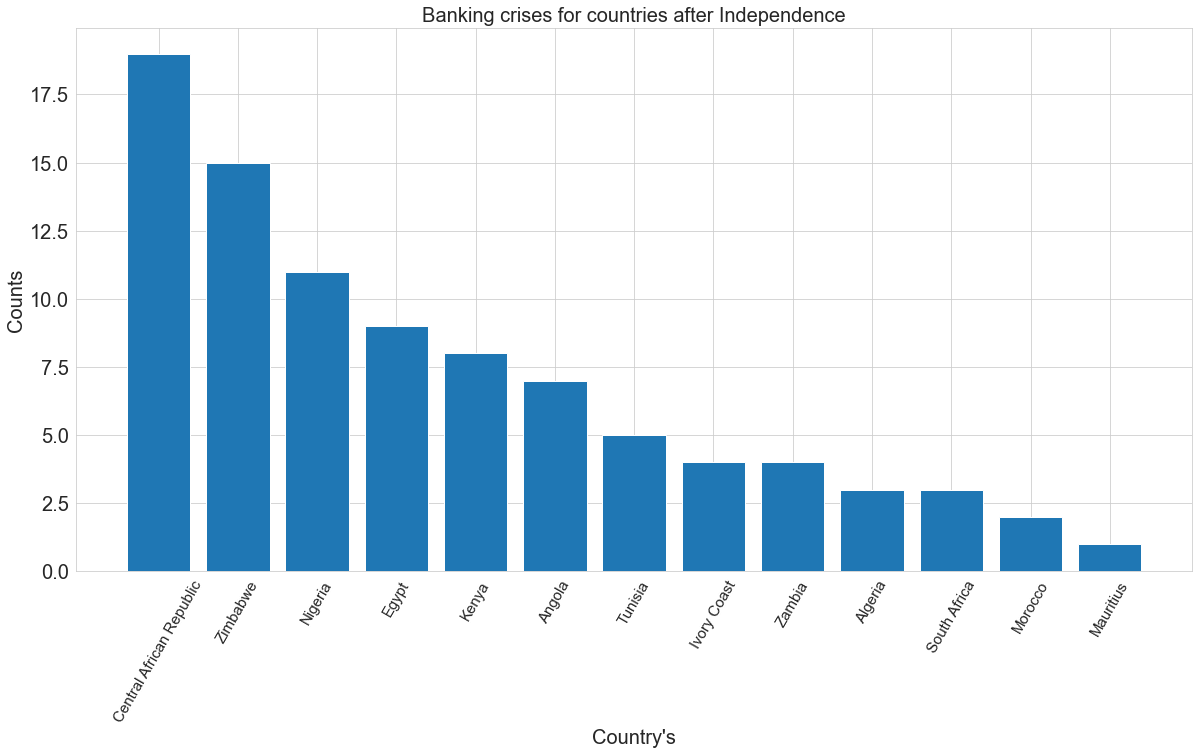

In [28]:
'''Barplot'''
'''Banking crises after independence'''

bank_crises_per_country_independent = freed_countries.groupby("country",as_index=False)["banking_crises"].sum() 
countries_sorted_indep_bank = bank_crises_per_country_independent.sort_values(by = ["banking_crises"], ascending=False)

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
plt.bar(countries_sorted_indep_bank["country"], countries_sorted_indep_bank["banking_crises"])
plt.title("Banking crises for countries after Independence",fontsize=20)
plt.xticks(rotation = 60)
plt.ylabel('Counts',fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Country's",fontsize=20)
plt.xticks(fontsize=15)
plt.savefig('Barchart_Banking_crises.pdf',dpi=400)
plt.show()

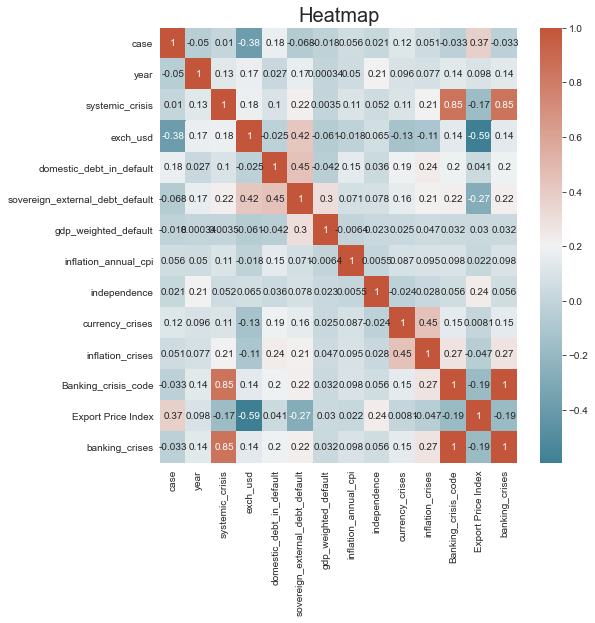

In [11]:
# Generate Heat Map to see the correlation between Systemic crises and Banking crises
plt.figure(figsize=(8,8))
plt.title('Heatmap',fontsize=20)
plt.xticks(rotation = 45)
sns.heatmap(df1.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)) #,fmt=".1f")
plt.savefig('HeatMap_Systemic_crises_and_Banking_crises.pdf',dpi=400)
plt.show()
# Banking crises and Systemic crises are highley co-related.
# Sovereign External Debt default and Domestic Debt default  are related 
# Sovereign External Debt default and Exchange Rate in USD  are related 
# Currency Crises and Inflation crises have a relation 

/Users/vijayreddyaerrabole/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


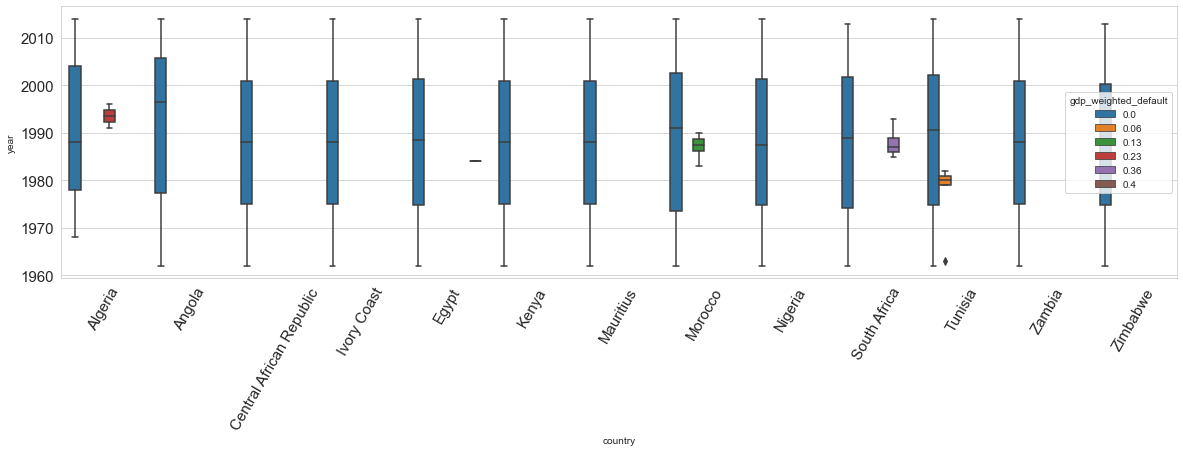

In [12]:
plt.figure(figsize=[20,5])
sns.boxplot(df1["country"],df1["year"],df1["gdp_weighted_default"])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(rotation = 60)
plt.savefig('Boxplot_GDP_Weighted_default.pdf',dpi=400)
plt.show()

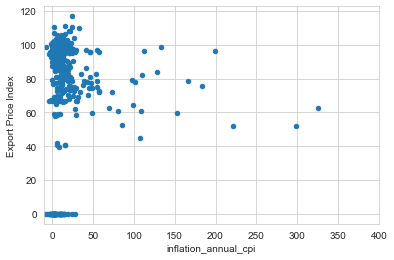

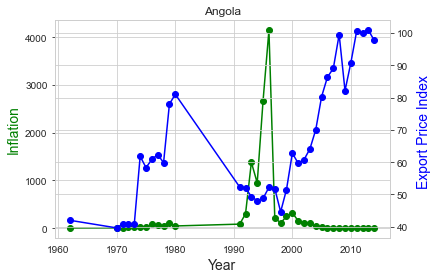

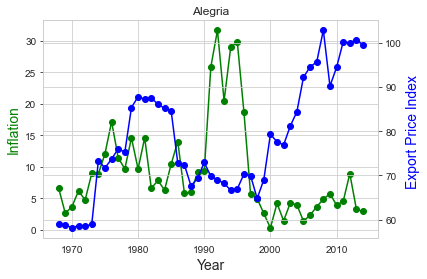

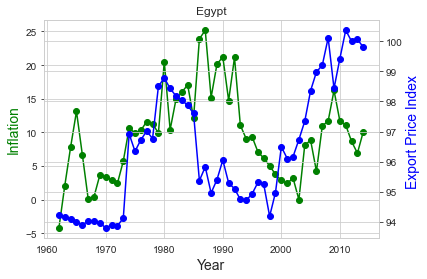

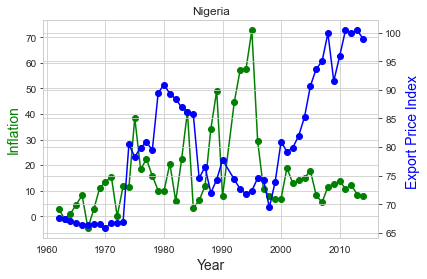

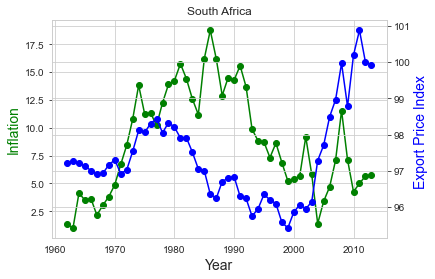

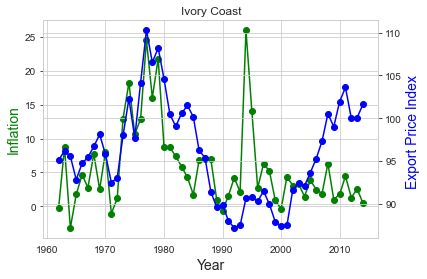

In [22]:
'''scatter plot- Thies graph was made to explain the negative correlation between rate of growth of export prices and rate of growth of domestic prices. 
The correlation explains that while export prices for commodities declined during 1980s, inflation increased during 1980s and 1990s. 
Note such negative relation exists because of low export diversification in these economies.'''

fig1=df1.plot.scatter(x='inflation_annual_cpi',y='Export Price Index',xlim = (-10,400)).get_figure()

fig1.savefig('Scatter plot_Correlation.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#z = np.polyfit(x, y)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

#closing the file
plt.close(fig1)


'''line graph-- The line graph for each country explicitly shows the slump in export prices and increase in inflation around 1980s, to strengthen the point above.
The presentation includes only two countries.  
--Angola'''

df2=african_crisis[(african_crisis.year >= 1962) & (african_crisis.country=='Angola')]
#df2.head()
#df2.info()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df2.year, df2.inflation_annual_cpi, color="green", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Inflation",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot

# set title
ax.set_title('Angola')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df2.year, df2["Export Price Index"],color="blue",marker="o")

ax2.set_ylabel("Export Price Index ",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('Linegraph_Angola.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#closing the file
plt.close(fig)


'''line graph-- Algeria'''

df3=african_crisis[(african_crisis.year >= 1962) & (african_crisis.country=='Algeria')]
#df3.head()
#df3.info()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df3.year, df3.inflation_annual_cpi, color="green", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Inflation",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot

# set title
ax.set_title('Alegria')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df3.year, df3["Export Price Index"],color="blue",marker="o")

ax2.set_ylabel("Export Price Index ",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('Linegraph_Alegria.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#closing the file
plt.close(fig)

'''line graph-- Egypt'''

df4=african_crisis[(african_crisis.year >= 1962) & (african_crisis.country=='Egypt')]
#df3.head()
#df3.info()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df4.year, df4.inflation_annual_cpi, color="green", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Inflation",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot

# set title
ax.set_title('Egypt')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df4.year, df4["Export Price Index"],color="blue",marker="o")

ax2.set_ylabel("Export Price Index ",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('Linegraph_Egypt.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#closing the file
plt.close(fig)


'''line graph-- Nigeria'''

df5=african_crisis[(african_crisis.year >= 1962) & (african_crisis.country=='Nigeria')]
#df3.head()
#df3.info()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df5.year, df5.inflation_annual_cpi, color="green", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Inflation",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot

# set title
ax.set_title('Nigeria')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df5.year, df5["Export Price Index"],color="blue",marker="o")

ax2.set_ylabel("Export Price Index ",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('Linegraph_Nigeria.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#closing the file
plt.close(fig)


'''line graph-- South Africa'''

df6=african_crisis[(african_crisis.year >= 1962) & (african_crisis.country=='South Africa')]
#df3.head()
#df3.info()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df6.year, df6.inflation_annual_cpi, color="green", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Inflation",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot

# set title
ax.set_title('South Africa')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df6.year, df6["Export Price Index"],color="blue",marker="o")

ax2.set_ylabel("Export Price Index ",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('Linegraph_South Africa.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#closing the file
plt.close(fig)

'''line graph-- Ivory Coast'''

df7=african_crisis[(african_crisis.year >= 1962) & (african_crisis.country=='Ivory Coast')]
#df3.head()
#df3.info()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df7.year, df7.inflation_annual_cpi, color="green", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Inflation",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot

# set title
ax.set_title('Ivory Coast')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df7.year, df7["Export Price Index"],color="blue",marker="o")

ax2.set_ylabel("Export Price Index ",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('Linegraph_Ivory Coast.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

#closing the file
plt.close(fig)

In [14]:
print(df1.groupby('country')['systemic_crisis'].sum())

country
Algeria                      3
Angola                       0
Central African Republic    19
Egypt                        4
Ivory Coast                  4
Kenya                       13
Mauritius                    0
Morocco                      2
Nigeria                     10
South Africa                 0
Tunisia                      5
Zambia                       4
Zimbabwe                    15
Name: systemic_crisis, dtype: int64


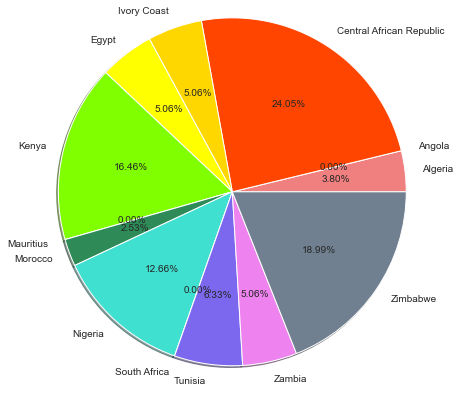

In [20]:
# Piechart for systemic crises 
df14 = pd.read_csv('African_crisis.csv')
dfPie = df14[df14['year'] > 1960]
slices = dfPie.groupby('country')['systemic_crisis'].sum().tolist()
countries = dfPie['country'].unique()
colors = ['lightcoral', 'indianred', 'orangered', 'gold', 'yellow', 'chartreuse', 'palegreen',
          'seagreen', 'turquoise', 'darkturquoise', 'mediumslateblue', 'violet', 'slategray']
plt.pie(slices, labels = countries, colors = colors, shadow = True, startangle=0, radius = 2, autopct = '%2.2f%%')
plt.savefig('Piechart_systemic_crisis.pdf',dpi=400)
plt.show()

min: 1965
max: 2013
min: 1963
max: 2014


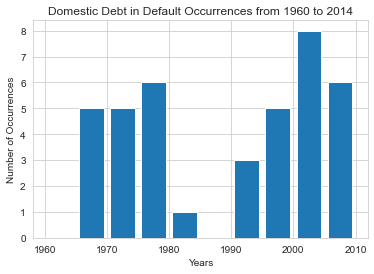

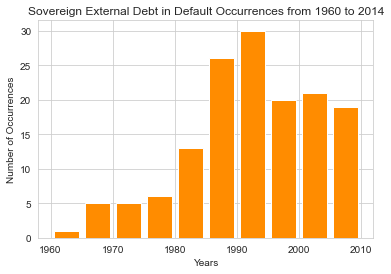

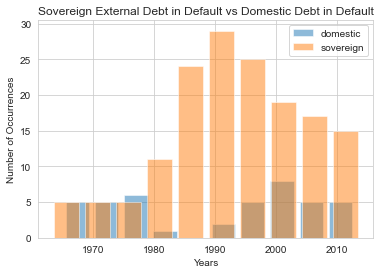

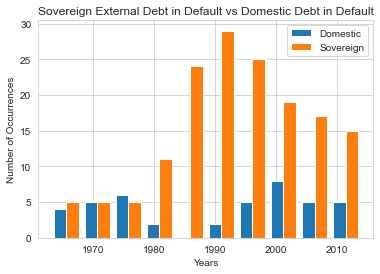

In [19]:
df13 = pd.read_csv('African_crisis.csv')
dfHist1 = df13.loc[(df13.domestic_debt_in_default == 1) & (df13.year > 1960), 'year']
dfHist2 = df13.loc[(df13.sovereign_external_debt_default == 1) & (df13.year >= 1960), 'year']
domesticDefault = dfHist1.tolist()
externalDefault = dfHist2.tolist()
print("min:", min(domesticDefault))
print("max:", max(domesticDefault))
print("min:", min(externalDefault))
print("max:", max(externalDefault))

ranges = (1960, 2010)
bins = 10

# domestic debt default years
plt.hist(domesticDefault, bins, ranges, histtype = 'bar', rwidth = 0.8)
plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.title('Domestic Debt in Default Occurrences from 1960 to 2014')
plt.savefig('Histogram_domestic_debt_default_years.pdf',dpi=400)
plt.show()

# external debt default years
plt.hist(externalDefault, bins, ranges, color='darkorange', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.title('Sovereign External Debt in Default Occurrences from 1960 to 2014')
plt.savefig('Histogram_Sovereign External Debt.pdf',dpi=400)
plt.show()

# overlap
plt.hist(domesticDefault, bins, alpha=0.5, label='domestic', rwidth = 0.8)
plt.hist(externalDefault, bins, alpha=0.5, label='sovereign', rwidth = 0.8)
plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.title('Sovereign External Debt in Default vs Domestic Debt in Default')
plt.savefig('Histogram_SED_DDD_Overlap.pdf',dpi=400)
plt.show()

# side-by-side
plt.hist([domesticDefault, externalDefault], bins, label=['Domestic', 'Sovereign'])
plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.title('Sovereign External Debt in Default vs Domestic Debt in Default')
plt.savefig('Histogram_SED_DDD_Side_by_Side.pdf',dpi=400)
plt.show()

21989695.22
-8.823529412
7.095
                       country  year  inflation_annual_cpi
1053                  Zimbabwe  2008          2.198970e+07
1052                  Zimbabwe  2007          6.627989e+04
143                     Angola  1996          4.146010e+03
142                     Angola  1995          2.672230e+03
140                     Angola  1993          1.379476e+03
...                        ...   ...                   ...
385                      Egypt  1962         -4.203776e+00
661                    Nigeria  1967         -4.553047e+00
192   Central African Republic  1987         -6.986000e+00
1054                  Zimbabwe  2009         -7.670000e+00
177   Central African Republic  1972         -8.823529e+00

[689 rows x 3 columns]
lower: 37    2.919708
Name: inflation_annual_cpi, dtype: float64
upper: 38    6.599988
Name: inflation_annual_cpi, dtype: float64
inflationAvg 4.7598479335
lower1: 51    5.882353
Name: inflation_annual_cpi, dtype: float64
upper1: 52    7

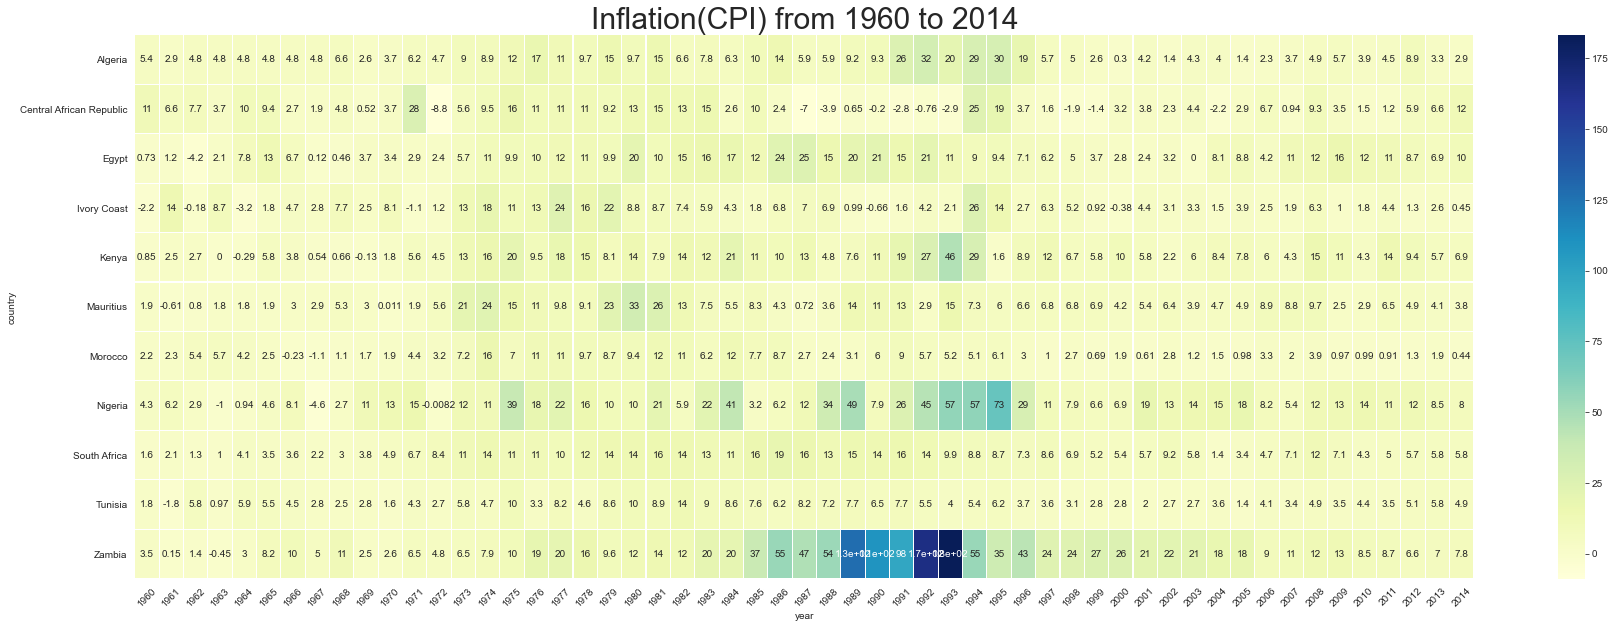

In [21]:
df12 = pd.read_csv("African_crisis.csv")
#df12.head()
dfHeatmap = df12.loc[(df12.year >= 1960), ['country','year','inflation_annual_cpi']]

# checking data for outliers
print(dfHeatmap['inflation_annual_cpi'].max())
print(dfHeatmap['inflation_annual_cpi'].min())
print(dfHeatmap['inflation_annual_cpi'].median())
print(dfHeatmap.sort_values(by='inflation_annual_cpi', ascending=False))

# interpolating missing inflation data with the year before and after gap
# fill Algeria missing values
print("lower:", lower:= dfHeatmap.loc[(dfHeatmap.year == 1961) & (dfHeatmap.country == 'Algeria'), 'inflation_annual_cpi'])
print("upper:", upper:= dfHeatmap.loc[(dfHeatmap.year == 1968) & (dfHeatmap.country == 'Algeria'), 'inflation_annual_cpi'])
print("inflationAvg", inflationAvg:= (float(lower) + float(upper))/2)
missingValAlgeria = {
    'country': ['Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria'],
    'year': [1962, 1963, 1964, 1965, 1966, 1967],
    'inflation_annual_cpi': [inflationAvg, inflationAvg, inflationAvg, inflationAvg, inflationAvg, inflationAvg]
}
dfHeatmap = dfHeatmap.append(pd.DataFrame(missingValAlgeria), ignore_index=True)

# fill Angola missing values
print("lower1:", lower1:= dfHeatmap.loc[(dfHeatmap.year == 1962) & (dfHeatmap.country == 'Angola'), 'inflation_annual_cpi'])
print("upper1:", upper1:= dfHeatmap.loc[(dfHeatmap.year == 1970) & (dfHeatmap.country == 'Angola'), 'inflation_annual_cpi'])
print("inflationAvg1:", inflationAvg1:= (float(lower1) + float(upper1))/2)
print("lower2:", lower2:= dfHeatmap.loc[(dfHeatmap.year == 1980) & (dfHeatmap.country == 'Angola'), 'inflation_annual_cpi'])
print("upper2:", upper2:= dfHeatmap.loc[(dfHeatmap.year == 1991) & (dfHeatmap.country == 'Angola'), 'inflation_annual_cpi'])
print("inflationAvg2:", inflationAvg2:= (float(lower2) + float(upper2))/2)
missingValAngola = {
    'country': list(17 * ('Angola',)),
    'year': list(range(1963, 1970)) + list(range(1981,1991)),
    'inflation_annual_cpi': [inflationAvg1 for i in range(1963, 1970)] + [inflationAvg2 for i in range(1981, 1991)]
}
dfHeatmap = dfHeatmap.append(pd.DataFrame(missingValAngola), ignore_index=True)

# fill Nigeria missing values
lower = dfHeatmap.loc[(dfHeatmap.year == 1990) & (dfHeatmap.country == 'Nigeria'), 'inflation_annual_cpi']
upper = dfHeatmap.loc[(dfHeatmap.year == 1992) & (dfHeatmap.country == 'Nigeria'), 'inflation_annual_cpi']
inflationAvg = (float(lower) + float(upper))/2
missingValNigeria = {
    'country': ['Nigeria'],
    'year': [1991],
    'inflation_annual_cpi': [inflationAvg]
}
dfHeatmap = dfHeatmap.append(pd.DataFrame(missingValNigeria), ignore_index=True)

# fill Zimbabwe missing values
missingValZimbabwe = {
    'country': ['Zimbabwe'],
    'year': [2014],
    'inflation_annual_cpi': [float(dfHeatmap.loc[(dfHeatmap.year == 2013) & (dfHeatmap.country == 'Zimbabwe'), 'inflation_annual_cpi'])]
}
dfHeatmap = dfHeatmap.append(pd.DataFrame(missingValZimbabwe), ignore_index=True)

# fill South Africa missing values
missingValSA = {
    'country': ['South Africa'],
    'year': [2014],
    'inflation_annual_cpi': [float(dfHeatmap.loc[(dfHeatmap.year == 2013) & (dfHeatmap.country == 'South Africa'), 'inflation_annual_cpi'])]
}
dfHeatmap = dfHeatmap.append(pd.DataFrame(missingValSA), ignore_index=True)

dfHeatmapSorted = dfHeatmap.sort_values(by=['country','year'])
print(dfHeatmapSorted)
# remove outliers Zimbabwe and Angola from countries to be compared
dfHeatmapSorted.drop(index=dfHeatmapSorted[dfHeatmapSorted['country'] == 'Zimbabwe'].index, inplace=True)
dfHeatmapSorted.drop(index=dfHeatmapSorted[dfHeatmapSorted['country'] == 'Angola'].index, inplace=True)


heatmap = pd.pivot_table(dfHeatmapSorted, values='inflation_annual_cpi', index='country', columns='year')
plt.figure(figsize=(30, 10))
plt.title('Inflation(CPI) from 1960 to 2014', fontsize=30)
plt.xticks(rotation = 45)
sns.heatmap(heatmap, linewidths=.1, annot=True, cmap="YlGnBu")
plt.savefig('Heatmap_inflation_annual_cpi.pdf',dpi=400)
plt.show()


/Users/vijayreddyaerrabole/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vijayreddyaerrabole/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vijayreddyaerrabole/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

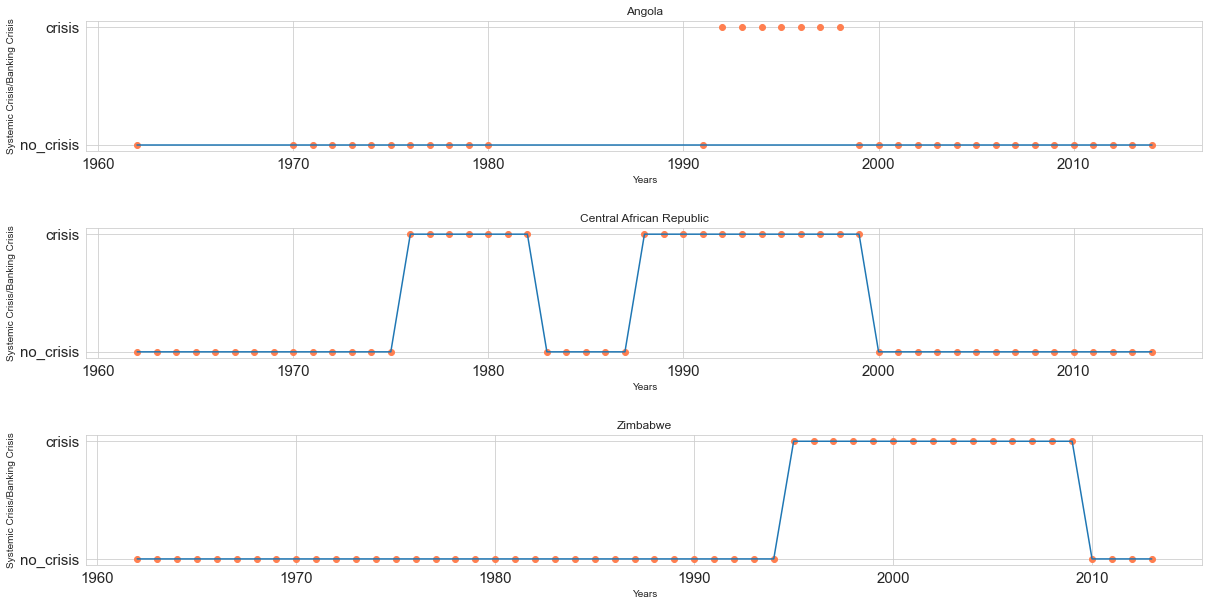

In [32]:
# systemic crisis and banking crisis for CAR,Kenya & Zimbabwe
systemic = df1[['year','country', 'systemic_crisis', 'exch_usd', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | 
                    (systemic['country']=='Angola') | 
                    (systemic['country']=='Zimbabwe') ]

plt.figure(figsize=(20,10))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()),1,count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(subset['year'],subset['systemic_crisis'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.xticks(fontsize=15)
    plt.ylabel('Systemic Crisis/Banking Crisis',fontsize=10)
    plt.yticks(fontsize=15)
    plt.title(country)
    count+=1
plt.savefig('Systemic Crisis_Banking Crisis_Linegraph.pdf',dpi=400)
plt.show()

'''Conclusion: Our analysis explains the causes of systemic crisis faced by 13 African Economies during 1980s and 1990s. We found that decline
in global commodity prices such as Oil and petroleum products and other agricultural commodites impacted the trade/external accounts of these countries. 
Furthermore, with limited exports diversification and low capital inflows and spillover effectof such price increase was stronger on their domestic economy. 
For example in Angola, as the energy prices tumbled, the economy which was heavily dependent on oil and gas revenues and had borrowed billions of dollars 
at high rate of interest under the assumption that oil revenues will help in repayments. But by early 1990s, Alegria was spending all of its oil income
to service its external debt (Pierre, A.J and Quandt (1995), Jstor). Other countries also faced similar situation which lead to increase in soevrign debt
for these countries. This increase in debt lead to increased the rate of growth of domestic prices or inflation and hence adversly impacted their economy.'''

''' Recommendations: 1. Since data tries to explain the causes of systemic crisis, more variables should be included such as government deficit, 
external and domestic debt, trade deficit and export and import prices indices and other macro-economic variables such as rate of growth of GDP 
and interest rates.
2. Including data from 1860s is redundant as the primary motivation of the data is to study systemice crisis which happened after 1980. 
Also most of the countries do not have data before 1950s and imputation for 100 years may not be realible for any analysis.'''
 









